<a href="https://colab.research.google.com/github/nameissid1/LGMVIP-WEB-TASK-3/blob/main/Task_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_excel('/content/HousePricePrediction.xlsx')

# Drop rows with missing target values
data.dropna(subset=['SalePrice'], inplace=True)

# Separate features (X) and target variable (y)
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

# Append classifier to preprocessing pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LinearRegression())])

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 2917494855.290912
R-squared: 0.6196387511450023


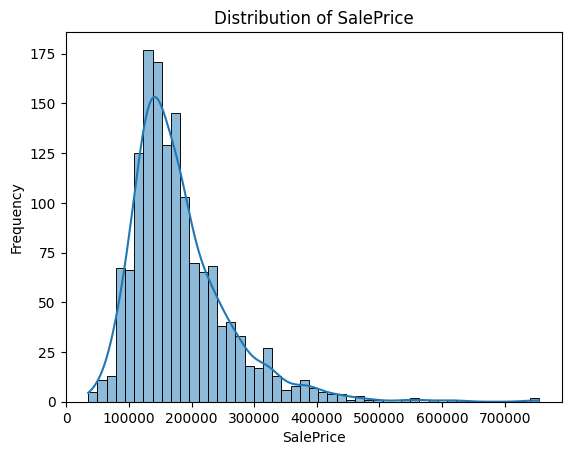

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Visualizing the distribution of a numeric variable (e.g., 'SalePrice')
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()




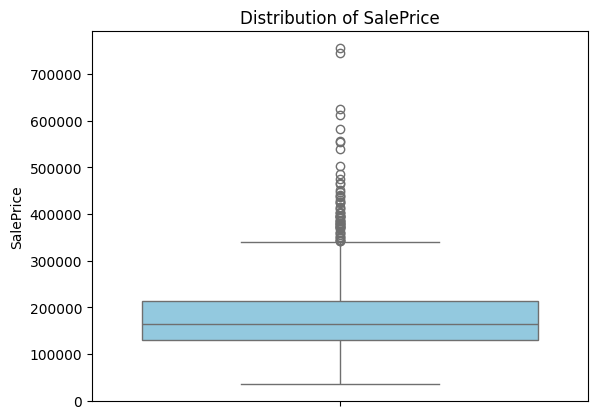

In [11]:
import seaborn as sns

# Example: Visualizing the distribution of a numerical feature (e.g., 'SalePrice') using a box plot
sns.boxplot(y=data['SalePrice'], color='skyblue')
plt.title('Distribution of SalePrice')
plt.ylabel('SalePrice')
plt.show()


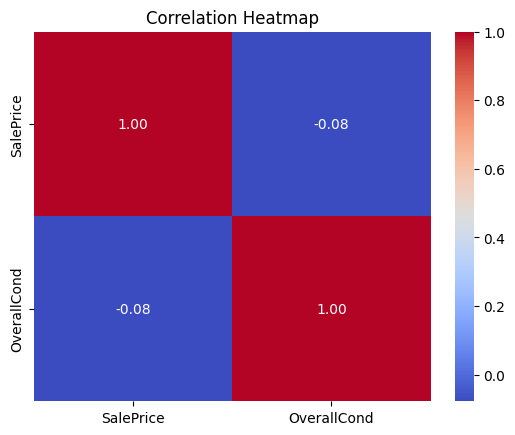

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features for correlation analysis
numerical_features = ['SalePrice', 'OverallCond']

# Calculate the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
